# Trabalho Final

**Autor**: Matheus Jericó Palhares <br>
**LinkedIn**: https://linkedin.com/in/matheusjerico

### Dataset - Gender Recognition by Voice
**Link**:<br> https://www.kaggle.com/mlg-ulb/creditcardfraud

**Contexto**: <br>
Esse dataset foi criado com objetivo de identificar uma voz como masculina ou feminina, com base nas propriedades acústicas da voz e da fala. O Dataset consistem em 3168 registros de vozes, coletadas de falantes masculinos e femininos. As amostras de voz são pré-processadas por análise acústica em R usando os pacotes seewave e tuneR, com uma faixa de frequência analisada de 0hz-280hz (faixa vocal humana).

**Conteúdo**:<br>
Features do dataset:
- meanfreq: mean frequency (in kHz)
- sd: standard deviation of frequency
- median: median frequency (in kHz)
- Q25: first quantile (in kHz)
- Q75: third quantile (in kHz)
- IQR: interquantile range (in kHz)
- skew: skewness (see note in specprop description)
- kurt: kurtosis (see note in specprop description)
- sp.ent: spectral entropy
- sfm: spectral flatness
- mode: mode frequency
- centroid: frequency centroid (see specprop)
- peakf: peak frequency (frequency with highest energy)
- meanfun: average of fundamental frequency measured across acoustic signal
- minfun: minimum fundamental frequency measured across acoustic signal
- maxfun: maximum fundamental frequency measured across acoustic signal
- meandom: average of dominant frequency measured across acoustic signal
- mindom: minimum of dominant frequency measured across acoustic signal
- maxdom: maximum of dominant frequency measured across acoustic signal
- dfrange: range of dominant frequency measured across acoustic signal
- modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range
- label: male or female


**Resolução**: <br>
Para resolução do problema, utilizaremos algoritmos de aprendizagem supervisionada.

## 1. Carregando Bibliotecas

In [1]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, classification_report, f1_score, precision_score, accuracy_score
from sklearn.model_selection import cross_val_score, KFold, train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import seaborn as sns
from pandas_profiling import ProfileReport

## 2. Carregando dados

- Foi feito o donwload dos dados e inseridos no diretório ```/dataset```;
- Utilizamos a biblioteca Pandas para carregar o dataset.

In [2]:
dataset = pd.read_csv("dataset/voice.csv")

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

**ANÁLISE**:
- Dataset não possui valores NaN;
- 20 variáveis;
- Label é a coluna target;
- Todos as variáveis independentes são numéricos.

In [4]:
dataset.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


**ANÁLISE**:
- Os dados já foram pre processados.

## 3. Exploração dos dados

In [5]:
print(f"Valores únicos da label: {dataset.label.unique()}")

Valores únicos da label: ['male' 'female']


In [6]:
print("Divisão dos dados:")
print(f"Male: {round(dataset['label'].value_counts()[0]/len(dataset) * 100,2)}%.")
print(f"Female: {round(dataset['label'].value_counts()[1]/len(dataset) * 100,2)}%.")

Divisão dos dados:
Male: 50.0%.
Female: 50.0%.


**ANÁLISE**:
- O dataset é balanceado e pre processado.

### 3.1. Existe diferência entre as vozes masculinas e femininas?

In [7]:
male = dataset[dataset['label'] == 'male']
female = dataset[dataset['label'] == 'female']

In [8]:
male.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,0.170813,0.065110,0.175299,0.115562,0.226346,0.110784,3.295460,48.331698,0.917188,0.471670,0.152022,0.170813,0.115872,0.034175,0.253836,0.728877,0.040307,4.358447,4.318139,0.177430
std,0.026254,0.009455,0.037392,0.031999,0.024050,0.020415,5.135190,163.115940,0.028938,0.150473,0.084024,0.026254,0.017179,0.015749,0.036003,0.445997,0.049199,3.000285,3.000605,0.130132
min,0.039363,0.041747,0.010975,0.000240,0.042946,0.021841,0.326033,2.068455,0.786650,0.080963,0.000000,0.039363,0.055565,0.010953,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.155625,0.058957,0.149952,0.101205,0.211918,0.100960,1.461931,5.003020,0.899557,0.363316,0.098914,0.155625,0.104171,0.017719,0.246154,0.399170,0.007812,1.759766,1.751953,0.099184
50%,0.176343,0.061781,0.180612,0.122315,0.228117,0.109940,1.880420,6.970088,0.917309,0.461636,0.157557,0.176343,0.117254,0.036166,0.271186,0.686687,0.023438,4.457031,4.429688,0.139904
75%,0.190593,0.070915,0.202362,0.136044,0.244819,0.119331,2.645467,12.282596,0.936048,0.576902,0.228117,0.190593,0.128236,0.047572,0.277457,1.032536,0.031250,6.035156,6.000000,0.212205
max,0.225582,0.096030,0.248840,0.226740,0.268924,0.196168,34.537488,1271.353628,0.981997,0.831347,0.280000,0.225582,0.179051,0.121212,0.279070,2.805246,0.458984,21.867188,21.843750,0.932374


In [9]:
female.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,0.191000,0.049142,0.195942,0.165349,0.223184,0.057834,2.984875,24.805224,0.873066,0.344763,0.178541,0.191000,0.169742,0.039429,0.263848,0.929544,0.064987,5.736107,5.671120,0.170073
std,0.029960,0.018380,0.032149,0.049767,0.023121,0.042924,3.091454,97.669114,0.047288,0.179854,0.067175,0.029960,0.018460,0.021845,0.021529,0.576884,0.072739,3.854042,3.856124,0.107639
min,0.078847,0.018363,0.035114,0.000229,0.127637,0.014558,0.141735,2.209673,0.738651,0.036876,0.000000,0.078847,0.091912,0.009775,0.163934,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.177031,0.034977,0.181021,0.157892,0.206280,0.031106,1.962717,6.764500,0.839784,0.208125,0.168883,0.177031,0.157395,0.019116,0.258065,0.450566,0.023438,2.560547,2.435547,0.101201
50%,0.192732,0.041965,0.198226,0.175373,0.223744,0.042689,2.435808,9.607635,0.865861,0.277228,0.193670,0.192732,0.169408,0.047013,0.274286,0.867405,0.023438,6.042969,5.964844,0.138995
75%,0.211981,0.060452,0.216214,0.195243,0.241486,0.061268,3.086396,14.448639,0.908557,0.478122,0.218152,0.211981,0.181832,0.048534,0.277457,1.338521,0.140625,8.607422,8.531250,0.201557
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.978482,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.449219,21.796875,21.773438,0.857764


- 1º quartil em KHz

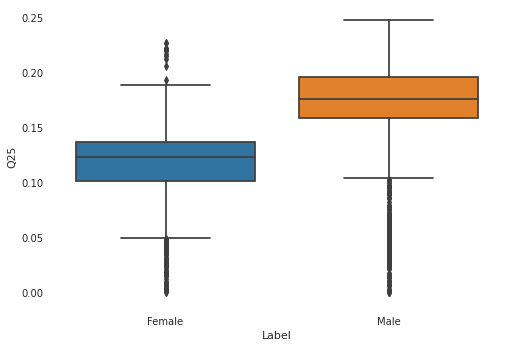

In [10]:
labels = ['Female', 'Male']
sns.boxplot(x = dataset['label'], y = dataset['Q25'])
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("Q25");

- Planicidade Espectral

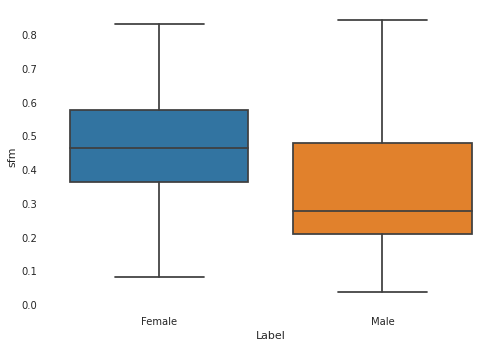

In [11]:
labels = ['Female', 'Male']
sns.boxplot(x = dataset['label'], y = dataset['sfm'])
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("sfm");

- Centróide de Frequência 

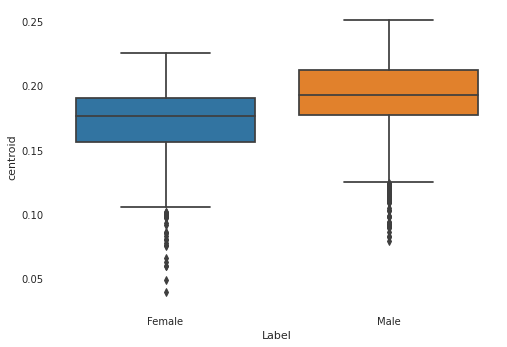

In [12]:
labels = ['Female', 'Male']
sns.boxplot(x = dataset['label'], y = dataset['centroid'])
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("centroid");

- Média da Frequência dominante medida no sinal acústico

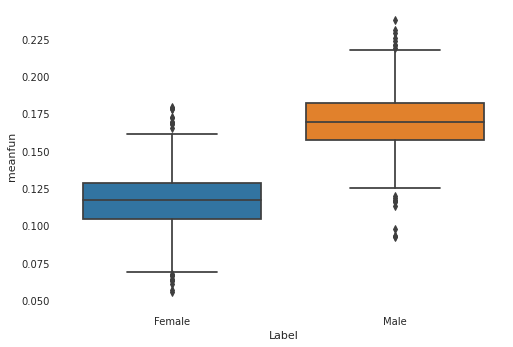

In [13]:
labels = ['Female', 'Male']
sns.boxplot(x = dataset['label'], y = dataset['meanfun'])
plt.xticks(range(2), labels)
plt.xlabel("Label")
plt.ylabel("meanfun");

**ANÁLISE**:
- Podemos ver diferenças significantes entre as vozes masculinas e femininas utilizando BoxPlot

### 3.2. Transformando a variável target em binário

In [14]:
dataset['label_cat'] = dataset['label'].apply(lambda x: 1 if x == 'male' else 0)
dataset.sample(5).head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label,label_cat
1156,0.180804,0.070863,0.175456,0.128046,0.243531,0.115485,2.056474,7.450579,0.913646,0.489821,...,0.134689,0.049130,0.279070,0.533078,0.023438,3.726562,3.703125,0.099156,male,1
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female,0
1018,0.197688,0.056555,0.212774,0.146527,0.246061,0.099534,1.748615,6.888620,0.910723,0.286311,...,0.126432,0.047198,0.279070,0.589453,0.023438,6.187500,6.164062,0.065883,male,1
2149,0.197306,0.021782,0.200416,0.186343,0.212062,0.025719,2.620309,9.423510,0.771301,0.093359,...,0.185434,0.038835,0.228571,0.200721,0.164062,0.242188,0.078125,0.183333,female,0
1527,0.121727,0.077395,0.108819,0.053303,0.200677,0.147374,3.539520,33.242832,0.953774,0.672605,...,0.109024,0.017957,0.262295,0.080631,0.007812,0.234375,0.226562,0.187821,male,1


### 3.3. Correlação entre as variáveis

- Primeiramente, correlação não implica causalidade.

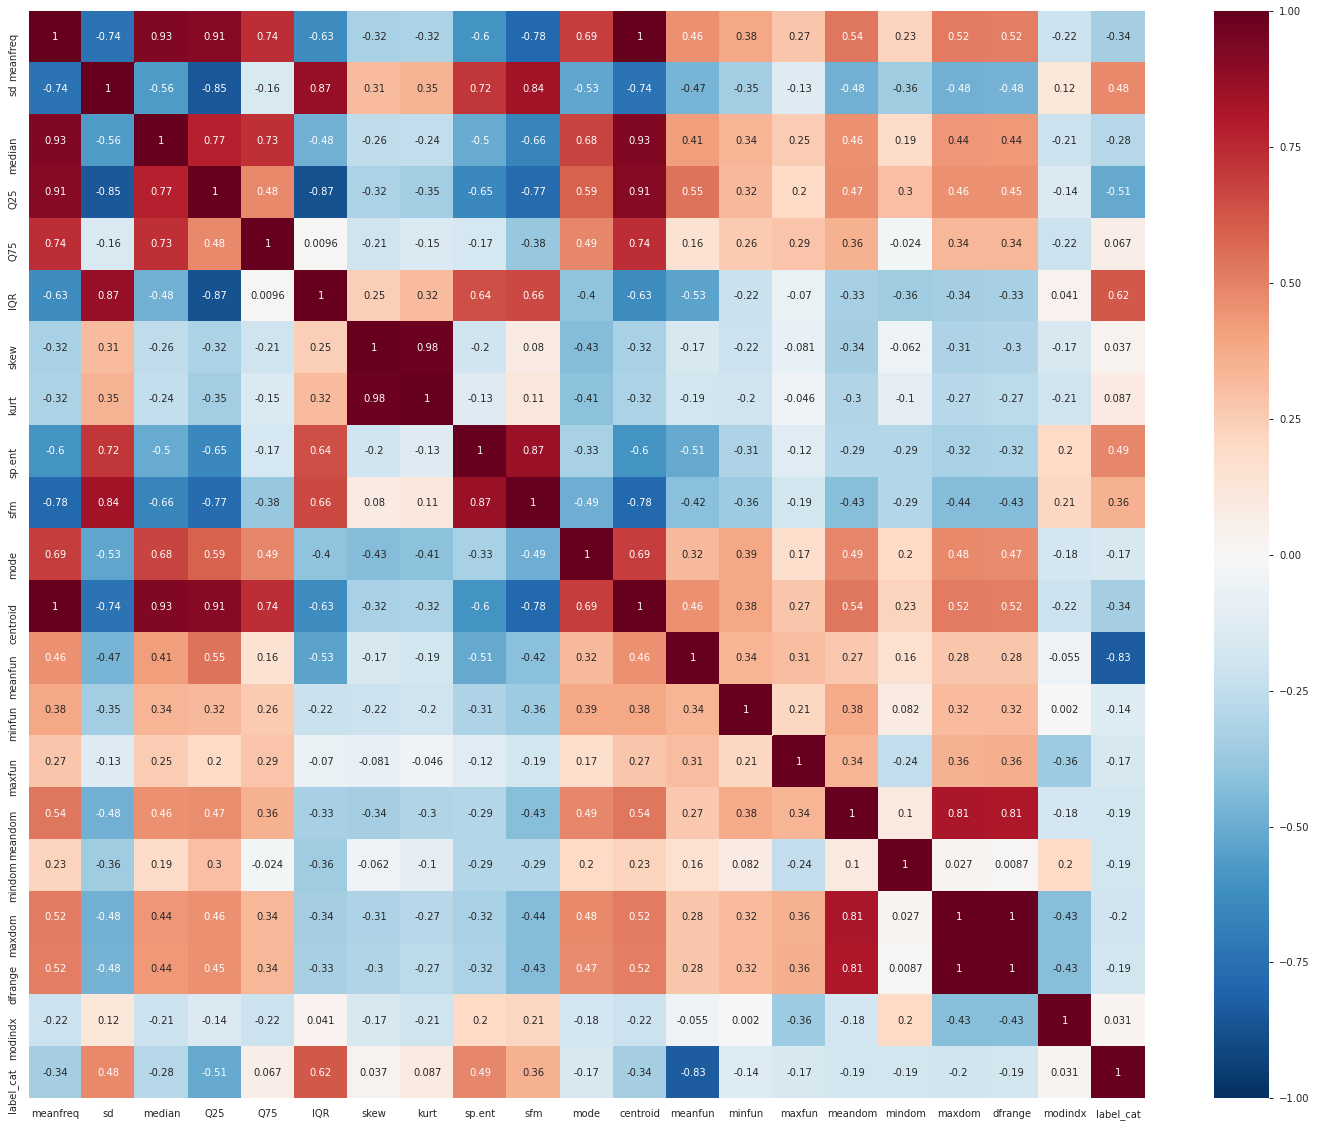

In [15]:
plt.figure(figsize=(25, 20))
heat_map = sns.heatmap(dataset.corr(),annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")
plt.show(heat_map)

### 3.4. Remover multicolinearidade?

In [16]:
dataset.drop(columns=['label'], inplace = True)

In [17]:
corr_matrix = dataset[:-1].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
dataset.drop(dataset[to_drop], axis=1, inplace=True)

In [18]:
dataset.shape

(3168, 16)

### 3.5. Features mais importantes

- Para analisar as features mais relevantes para detecção de Fraude, utilizamos dois algoritmos do método Ensemble para extrair as features.

#### 3.5.1. Separando feature e target.

In [19]:
dataset.head()

,meanfreq,sd,Q75,IQR,skew,sp.ent,sfm,mode,meanfun,minfun,maxfun,meandom,mindom,maxdom,modindx,label_cat
0,0.059781,0.064241,0.090193,0.075122,12.863462,0.893369,0.491918,0.000000,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,1
1,0.066009,0.067310,0.092666,0.073252,22.423285,0.892193,0.513724,0.000000,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.052632,1
2,0.077316,0.083829,0.131908,0.123207,30.757155,0.846389,0.478905,0.000000,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.046512,1
3,0.151228,0.072111,0.207955,0.111374,1.232831,0.963322,0.727232,0.083878,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.247119,1
4,0.135120,0.079146,0.206045,0.127325,1.101174,0.971955,0.783568,0.104261,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,0.208274,1


In [20]:
X = dataset.drop(columns=['label_cat'])
y = dataset['label_cat']

#### 3.5.2. Padronizando as features para analisar a importância real.

In [21]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### 3.5.3. Criando os Algoritmos para Feature Importance

In [22]:
random_forest_features = RandomForestClassifier(n_estimators=100, max_depth=15)
tree_features = DecisionTreeClassifier()

#### 3.5.4. Treinando os Algoritmos

In [23]:
random_forest_features.fit(X, y)
tree_features.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#### 3.5.5. Ordenando as features mais importantes

In [24]:
random_forest_features_imp = pd.Series(random_forest_features.feature_importances_,
                                       index = dataset.columns[:-1])
random_forest_features_imp_order = random_forest_features_imp.sort_values()

tree_features_imp = pd.Series(tree_features.feature_importances_,
                              index = dataset.columns[:-1])
tree_features_imp_order = tree_features_imp.sort_values()

#### 3.5.6 Visualizando resultados das features mais importantes

No handles with labels found to put in legend.
No handles with labels found to put in legend.


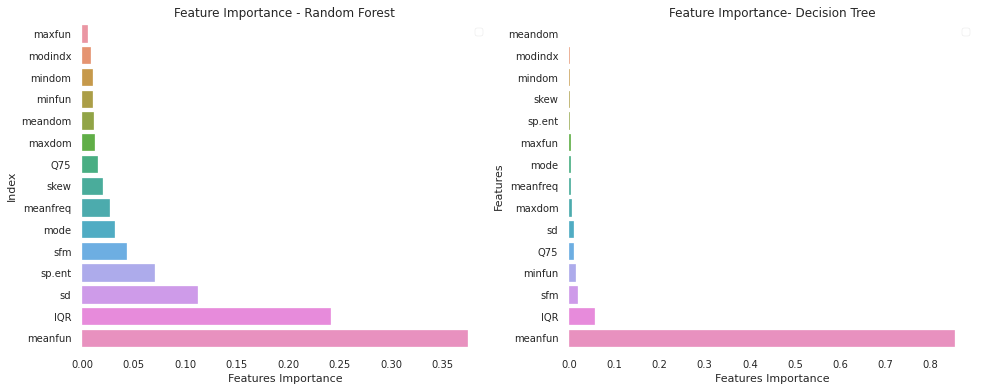

In [25]:
plt.figure(figsize=[16,6])
plt.subplot(1,2,1)
sns.barplot(x=random_forest_features_imp_order, y = random_forest_features_imp_order.index)
plt.xlabel("Features Importance")
plt.ylabel("Index")
plt.title("Feature Importance - Random Forest")
plt.legend()
plt.subplot(1,2,2)
sns.barplot(x=tree_features_imp_order, y = tree_features_imp_order.index)
plt.xlabel("Features Importance")
plt.ylabel("Features")
plt.title("Feature Importance- Decision Tree")
plt.legend()
plt.show()

**ANÁLISE**:
Entre os dois algoritmos, tivemos pouca divergência. Entretando, considerei o resultado das features mais importantes do algoritmo **Random Forest**, pois obteve considera uma maior quantidade de variáveis para tomada de decisão.

## 4. Processamento dos dados

### 4.1. Removendo as features com menor relevância

In [26]:
list_features = []
for k, v in random_forest_features_imp_order[:5].items():
    list_features.append(k)
    
print(f'Features com menor importância: {list_features}')

Features com menor importância: ['maxfun', 'modindx', 'mindom', 'minfun', 'meandom']


In [27]:
df = dataset.drop(columns=list_features)

In [28]:
df.shape

(3168, 11)

### 5.1. Separando dados de treino e teste

In [29]:
# df = dataset.copy()

In [30]:
X = df.drop(columns=['label_cat'])
y = df['label_cat']

In [31]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 6. ITS TIME!! Machine Learning

### 6.1 Métodos Ensemble
<img width="512" height="312" src="https://www.globalsoftwaresupport.com/wp-content/uploads/2018/02/ggff5544hh.png" />
Fonte: Global Software

#### 6.1.1. Bagging (Random Forest)

No Bagging os classificadores são treinados de forma independente por diferentes conjuntos de treinamento através do método de inicialização. Para construí-los é necessário montar k conjuntos de treinamento idênticos e replicar esses dados de treinamento de forma aleatória para construir k redes independentes por re-amostragem com reposição. Em seguida, deve-se agregar as k redes através de um método de combinação apropriada, tal como a maioria de votos (Maisa Aniceto, 2017).

#### 6.1.2. Boosting

No Boosting, de forma semelhante ao Bagging, cada classificador é treinado usando um conjunto de treinamento diferente. A principal diferença em relação ao Bagging é que os conjuntos de dados re-amostrados são construídos especificamente para gerar aprendizados complementares e a importância do voto é ponderado com base no desempenho de cada modelo, em vez da atribuição de mesmo peso para todos os votos. Essencialmente, esse procedimento permite aumentar o desempenho de um limiar arbitrário simplesmente adicionando learners mais fracos (Maisa Aniceto, 2017). Dada a utilidade desse achado, Boosting é considerado uma das descobertas mais significativas em aprendizado de máquina (LANTZ, 2013).

### 6.2. Comparando acurácia de 7 modelos de classificação utilizando validação cruzada
- Será selecionado 4 modelos para tunning de hiperparâmetros;
- Posteriormente, será selecionado o modelo que obter as melhores métricas.



In [33]:
# Definindo os valores para o número de folds
num_folds = 3
seed = 7

modelos = []
modelos.append(("Logistic Regression", LogisticRegression()))
modelos.append(('Naive Bayes', GaussianNB()))
modelos.append(("Decision Tree", DecisionTreeClassifier()))
modelos.append(("Random Forest", RandomForestClassifier()))
modelos.append(("XGB Classifier", XGBClassifier()))
modelos.append(("Gradient Boosting Classifier", GradientBoostingClassifier()))
modelos.append(('SVM', SVC()))

# Avaliando cada modelo em um loop
resultados = []
nomes = []
print(f"{'Nome do Modelo':{30}}| {'Acurácia Média':{15}} | {'Desvio Padrão':{5}}")
for nome, modelo in modelos:
    kfold = KFold(n_splits = num_folds, shuffle = True)
    cv_results = cross_val_score(modelo, X_train, y_train, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    print(f"{nome:{30}}: {(np.around(cv_results.mean(), decimals=4))*100:{10}}%\
    {(np.around(cv_results.std(), decimals=4))*100:{10}}%")

Nome do Modelo                | Acurácia Média  | Desvio Padrão
Logistic Regression           :       96.8%          0.13%
Naive Bayes                   :      93.69%          0.65%
Decision Tree                 :      96.93%    0.16999999999999998%
Random Forest                 : 97.92999999999999%    0.38999999999999996%
XGB Classifier                :      97.97%          0.69%
Gradient Boosting Classifier  : 97.78999999999999%    0.7799999999999999%
SVM                           : 97.92999999999999%    0.27999999999999997%


**ANÁLISE**:
    - Selecionei os seguintes modelos:
        - SVM;
        - Random Forest;
        - XGB Classifier;
        - Logistic Regression.



### 6.3. Aplicando GridSearch para tunning e Validando com os dados de teste
- A métrica escolhida para otimizar os hiperparâmetros foi a Acurácia, tendo em vista que o dataset é balanceado.

#### 6.3.1. Logistic Regression

In [34]:
# parâmetros da LogisticRegression
grid_rl = {"solver": ["liblinear", "lbfgs"],
           "C":[10, 25],
           "penalty" : ["l2"]}
# Criando modelo
logistic = LogisticRegression()
# Aplicando GridSearchCV
clf_lr = GridSearchCV(logistic, param_grid = grid_rl, cv=5, scoring = 'accuracy', verbose=0)
# Treinando modelo
clf_lr.fit(X_train, y_train)
# Fazendo predições
y_pred_logistic = clf_lr.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_logistic))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_logistic))
print("------------------------------------------------------")
print("LogisticRegression accuracy: {}".format(accuracy_score(y_test, y_pred_logistic)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       452
           1       0.97      0.97      0.97       499

    accuracy                           0.97       951
   macro avg       0.97      0.97      0.97       951
weighted avg       0.97      0.97      0.97       951

------------------------------------------------------
[[437  15]
 [ 13 486]]
------------------------------------------------------
LogisticRegression accuracy: 0.9705573080967402


In [35]:
print(f'Melhores parâmetros para o algorítmo Logistic Regression: {clf_lr.best_params_}')

Melhores parâmetros para o algorítmo Logistic Regression: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


#### 6.3.2 SVM

In [36]:
# parâmetros da GradientBoostingClassifier
grid_svc = {'C': [0.1,1, 10, 100], 
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']
           }

# Criando modelo
svm = SVC()
# Aplicando GridSearchCV
clf_svc = GridSearchCV(svm, param_grid = grid_svc, cv=5, scoring = 'accuracy', verbose=0, n_jobs=-1)
# Treinando modelo
clf_svc.fit(X_train, y_train)
# Fazendo predições
y_pred_svc = clf_svc.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_svc))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_svc))
print("------------------------------------------------------")
print("SVM accuracy: {}".format(accuracy_score(y_test, y_pred_svc)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       452
           1       0.98      0.98      0.98       499

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951

------------------------------------------------------
[[444   8]
 [ 12 487]]
------------------------------------------------------
SVM accuracy: 0.9789695057833859


In [37]:
print(f'Melhores parâmetros para o algorítmo SVM: {clf_svc.best_params_}')

Melhores parâmetros para o algorítmo SVM: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


#### 6.3.3. XGB Classifier

In [38]:
# parâmetros do XGBClassifier
grid_xgbc = { 'n_estimators': [50, 100, 200],
              'learning_rate': [0.01, 0.15],
              'max_depth': [15, 25, 50]}
# Criando o modelo
xgb = XGBClassifier()
# Aplicando GridSearchCV
clf_xgb = GridSearchCV(xgb, param_grid= grid_xgbc, cv=3,  scoring = 'accuracy', n_jobs = -1)
# Treinando modelo
clf_xgb.fit(X_train, y_train)
# Fazendo predições
y_pred_xgb = clf_xgb.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_xgb))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_xgb))
print("------------------------------------------------------")
print("XGBClassifier accuracy: {}".format(accuracy_score(y_test, y_pred_xgb)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       452
           1       0.99      0.97      0.98       499

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951

------------------------------------------------------
[[446   6]
 [ 16 483]]
------------------------------------------------------
XGBClassifier accuracy: 0.9768664563617245


In [39]:
print(f'Melhores parâmetros para o algorítmo XGB: {clf_xgb.best_params_}')

Melhores parâmetros para o algorítmo XGB: {'learning_rate': 0.15, 'max_depth': 15, 'n_estimators': 50}


#### 6.3.4 Random Forest Classifier

In [40]:
# parâmetros da Random Forest
grid_rf = {
    "n_estimators" : [50, 100, 200],
    "max_depth": [15, 25, 50],
    "max_features": ['auto']
    }

# Criando modelo
rf = RandomForestClassifier()
# Aplicando GridSearchCV
clf_rf = GridSearchCV(rf, param_grid = grid_rf, cv=3, scoring = 'accuracy', n_jobs = -1)
# Treinando modelo
clf_rf.fit(X_train, y_train)
# Fazendo predições
y_pred_rf = clf_rf.predict(X_test)
# Avaliando modelo
print(classification_report(y_test, y_pred_rf))
print("------------------------------------------------------")
print(confusion_matrix(y_test, y_pred_rf))
print("------------------------------------------------------")
print("RandomForestClassifier accuracy: {}".format(accuracy_score(y_test, y_pred_rf)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       452
           1       0.99      0.97      0.98       499

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951

------------------------------------------------------
[[445   7]
 [ 14 485]]
------------------------------------------------------
RandomForestClassifier accuracy: 0.9779179810725552


In [41]:
print(confusion_matrix(y_test, y_pred_rf))


[[445   7]
 [ 14 485]]


In [42]:
print(f'Melhores parâmetros para o algorítmo Random Forest: {clf_rf.best_params_}')

Melhores parâmetros para o algorítmo Random Forest: {'max_depth': 25, 'max_features': 'auto', 'n_estimators': 100}


## 7. Métricas

### 7.1. ROC AUC

In [43]:
print(f"Métrica ROC AUC:\n\
{'Logistic Regression:':{30}} {(np.around(roc_auc_score(y_test, y_pred_logistic), decimals=4))*100}%\n\
{'SVM:':{30}} {(np.around(roc_auc_score(y_test, y_pred_svc), decimals=4))*100}%\n\
{'XGB Classifier:':{30}} {(np.around(roc_auc_score(y_test, y_pred_xgb), decimals=3))*100}%\n\
{'Random Forest Classifier:':{30}} {(np.around(roc_auc_score(y_test, y_pred_rf), decimals=3))*100}%")

Métrica ROC AUC:
Logistic Regression:           97.04%
SVM:                           97.91%
XGB Classifier:                97.7%
Random Forest Classifier:      97.8%


**ANÁLISE**:
- Os quatro algoritmos tiverem resultados muito próximo.
- Dessa forma, não podemos selecionar nenhum algoritmo utilizando métrica ROC AUC.

### 7.2. Precision

In [44]:
print(f"Métrica Precisão (Precision):\n\
{'Logistic Regression:':{30}} {(np.around(precision_score(y_test, y_pred_logistic), decimals=4))*100}%\n\
{'SVM:':{30}} {(np.around(precision_score(y_test, y_pred_svc), decimals=4))*100}%\n\
{'XGB Classifier:':{30}} {(np.around(precision_score(y_test, y_pred_xgb), decimals=3))*100}%\n\
{'Random Forest Classifier:':{30}} {(np.around(precision_score(y_test, y_pred_rf), decimals=4))*100}%")

Métrica Precisão (Precision):
Logistic Regression:           97.00999999999999%
SVM:                           98.38%
XGB Classifier:                98.8%
Random Forest Classifier:      98.58%


**ANÁLISE**:
- Os quatro algoritmos tiveram resultados muito próximos.

### 7.3. Recall

In [45]:
print(f"Métrica Revocação (Recall):\n\
{'Logistic Regression:':{30}} {(np.around(recall_score(y_test, y_pred_logistic), decimals=4))*100}%\n\
{'SVM:':{30}} {(np.around(recall_score(y_test, y_pred_svc), decimals=4))*100}%\n\
{'XGB Classifier:':{30}} {(np.around(recall_score(y_test, y_pred_xgb), decimals=3))*100}%\n\
{'Random Forest Classifier:':{30}} {(np.around(recall_score(y_test, y_pred_rf), decimals=3))*100}%")

Métrica Revocação (Recall):
Logistic Regression:           97.39%
SVM:                           97.6%
XGB Classifier:                96.8%
Random Forest Classifier:      97.2%


**ANÁLISE**:
- Os quatro algorítmos tiveram resultados muito próximos

### 7.4. F1-Score

In [46]:
print(f"Métrica F1-Score:\n\
{'Logistic Regression:':{30}} {(np.around(f1_score(y_test, y_pred_logistic), decimals=4))*100}%\n\
{'SVM:':{30}} {(np.around(f1_score(y_test, y_pred_svc), decimals=3))*100}%\n\
{'XGB Classifier:':{30}} {(np.around(f1_score(y_test, y_pred_xgb), decimals=3))*100}%\n\
{'Random Forest Classifier:':{30}} {(np.around(f1_score(y_test, y_pred_rf), decimals=4))*100}%")

Métrica F1-Score:
Logistic Regression:           97.2%
SVM:                           98.0%
XGB Classifier:                97.8%
Random Forest Classifier:      97.88%


**ANÁLISE**:
- Os quatro algoritmos tiveram resultados muito próximos

### 7.5. Accuracy

In [47]:
print(f"Métrica Accuracy:\n\
{'Logistic Regression:':{30}} {(np.around(accuracy_score(y_test, y_pred_logistic), decimals=4))*100}%\n\
{'SVM:':{30}} {(np.around(accuracy_score(y_test, y_pred_svc), decimals=4))*100}%\n\
{'XGB Classifier:':{30}} {(np.around(accuracy_score(y_test, y_pred_xgb), decimals=3))*100}%\n\
{'Random Forest Classifier:':{30}} {(np.around(accuracy_score(y_test, y_pred_rf), decimals=3))*100}%")

Métrica Accuracy:
Logistic Regression:           97.06%
SVM:                           97.89999999999999%
XGB Classifier:                97.7%
Random Forest Classifier:      97.8%


## 8. Matriz de Confusão
- Vamos analisar a matriz de confusão do algoritmo que obteve melhor desempenho.

Text(0.5, 38.5, 'Classe Predita')

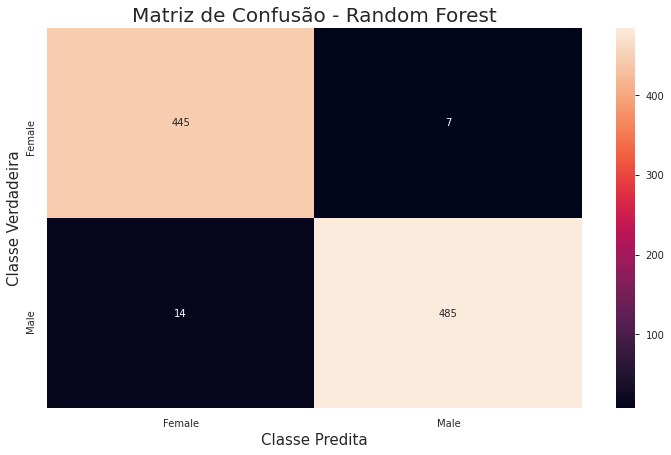

In [48]:
labels = ['Female', 'Male']
fig, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), xticklabels=labels, yticklabels=labels, annot=True, fmt="d");
ax.set_title("Matriz de Confusão - Random Forest", fontsize=20)
ax.set_ylabel('Classe Verdadeira', fontsize=15)
ax.set_xlabel('Classe Predita', fontsize=15)

# CONCLUSÃO

**ANÁLISE**:

- A comparação dos resultados dos algorítmos são muito próximos. Podemos concluir que esse é um problema relativamente fácil de resolver. As vozes masculinas e femininas possuem características muito distintas.
- O SVM obteve a melhor performace utilizando a métrica de Acurácia (devido ao fato do dataset ser balanceado e pré processado).
- Entretanto, os algorítmos do método ensamble ficaram com valores muito próximos ao do SVM

https://www.kaggle.com/rajmehra03/a-complete-tutorial-onpredictive-modeling-acc-99